# ¿Necesitas `pandas`?

* ¿Necesitas importar datos a Python?


* ¿Los datos no están limpios?


* ¿Necesitas explorar los datos y aumentar tu conocimiento sobre los mismos de forma rápida y simple?


* ¿Necesitas procesar tus datos y prepararlos para análisis posteriores con statsmodels, scikit-learn,..., otros?


* ¿...?

## Si respondes afirmativamente a cualquiera de las anteriores preguntas y no tienes mucha idea sobre `pandas` estás en el sitio adecuado...

# ¿Qué es `pandas`?

Para cualquier trabajo intensivo de datos `pandas` se ha convertido en la librería esencial dentro del mundo Python.

> Se podría ver a `pandas` como numpy arrays con esteroides, esto es, numpy arrays con etiquetas para columnas y filas y soporte mejorado para trabajo con datos heterogéneos.
    
Pero lo anterior es una definición un tanto superficial. El diablo está en los detalles!!!

## Características interesantes:


* Entrada/Salida para un montón de formatos de datos diferentes de forma rápida, simple y flexible (csv, json, sql, HDF5, HTML,...).


* Herramientas para trabajar con datos *missing* (`.dropna()`, `pd.isnull()`).


* Unión y combinación (`concat`, `join`, `merge`).


* Agrupamiento: funcionalidad `groupby`.


* Reshaping (`stack`, `unstack`, `pivot`, `pivot_table`).


* Potente manipulación de series de datos (*resampling*, *timezones*, ...).


* Graficado sencillo.

# ¿Qué vamos a ver?

* Tipos de estructuras de datos con `pandas`.


* Lectura/escritura de datos.


* Obtener información de la estructura de datos, algunas operaciones estadísticas, establecimiento de los índices, trabajo con valores perdidos/no disponibles. Trabajo con fechas.


* Selección e indexación de datos.


* Trabajo con datos perdidos, no disponibles,...


* Combinación, agrupamiento, agregación,...


* Graficado de resultados.

------------------------------

# Qué necesitamos para el tutorial

In [1]:
# primero hacemos los imports de turno
import os
import datetime as dt
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display

np.random.seed(19760812)
plt.style.use('bmh')
%matplotlib inline

In [2]:
print('Python version:')
print(sys.version)
print()
print('Pandas: ', pd.__version__)
print('Numpy: ', np.__version__)
print('Matplotlib: ', mpl.__version__)

Python version:
3.5.2 |Anaconda 4.0.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]

Pandas:  0.18.0
Numpy:  1.10.4
Matplotlib:  1.5.1


---------------------------------------------------

# Análisis preliminar de unos datos de viento

Antes de ver nada sobre pandas vamos a hacer un pequeño análisis de unos datos de viento para que veamos algunas de las capacidades de la librería.

In [3]:
# Leemos los datos del fichero 'model.txt'
ipath = os.path.join('Datos', 'model.txt')

model = pd.read_csv(ipath, sep = "\s*", skiprows = 3,
                    parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
C:\Anaconda3\lib\site-packages\pandas\io\parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\Anaconda3\lib\site-packages\pandas\io\parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [4]:
model.head()

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0
1984-01-01 03:00:00,20.4,244,7.5,1.24,1001.5,0.05,86.2
1984-01-01 04:00:00,20.3,245,7.5,1.24,1001.2,0.05,85.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015DCB438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015008470>]], dtype=object)

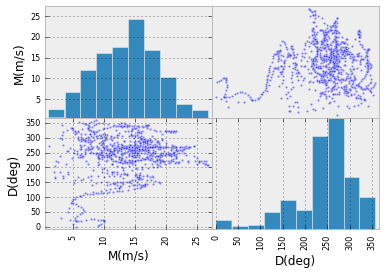

In [5]:
pd.tools.plotting.scatter_matrix(model.ix[0:1000, 'M(m/s)':'D(deg)'])

In [6]:
print(model.index[0], model.index[-1], sep = '\n')

1984-01-01 00:00:00
2015-09-10 23:00:00


In [7]:
model.mean()

M(m/s)         9.687760
D(deg)       193.255356
T(C)          10.141485
De(k/m3)       1.234480
PRE(hPa)    1003.027897
RiNumber     -25.652371
RH(%)         81.634157
dtype: float64

In [8]:
model.max()

M(m/s)         32.40
D(deg)        360.00
T(C)           30.80
De(k/m3)        1.33
PRE(hPa)     1032.40
RiNumber    93738.27
RH(%)         100.00
dtype: float64

In [9]:
idx = model.loc[:, 'M(m/s)'].sort_values(ascending = False).index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009273D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000093A7438>]], dtype=object)

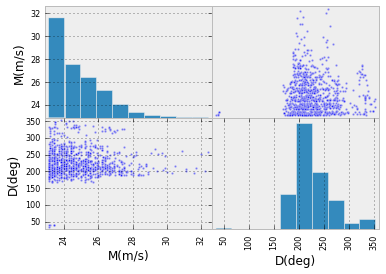

In [10]:
pd.tools.plotting.scatter_matrix(model.loc[idx[:1000], 'M(m/s)':'D(deg)'])

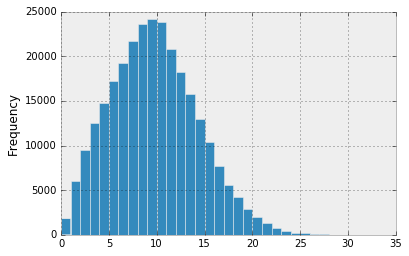

In [11]:
model.loc[:, 'M(m/s)'].plot.hist(bins = np.arange(0, 35))

In [12]:
model['month'] = model.index.month
model['year'] = model.index.year

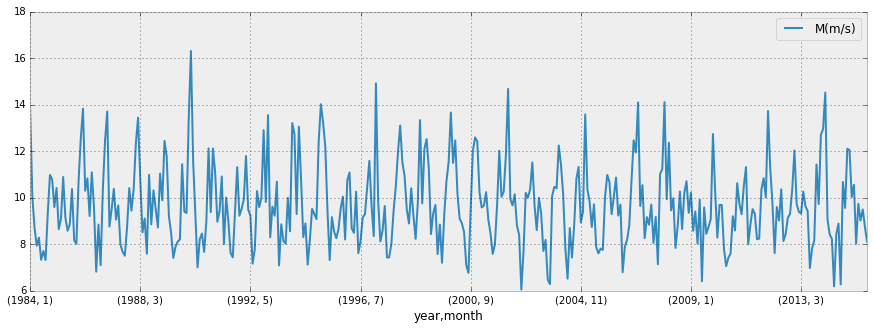

In [13]:
model.groupby(by = ['year', 'month']).mean().plot(y = 'M(m/s)', figsize = (15, 5))

In [14]:
monthly = model.groupby(by = ['year', 'month']).mean()
monthly['ma'] = monthly.loc[:, 'M(m/s)'].rolling(5, center = True).mean()
monthly.head()

M(m/s)      D(deg)      T(C)  De(k/m3)     PRE(hPa)   RiNumber  \
year month                                                                      
1984 1      13.821505  233.603495  4.621505  1.247419   993.974328  -2.823320   
     2      10.043534  164.089080  3.522701  1.269368  1007.659339 -29.335790   
     3       8.708199  153.081989  4.138306  1.261425  1003.437231   0.250726   
     4       7.939583  162.113889  6.781111  1.255986  1008.487083  -1.655014   
     5       8.283871  123.590054  8.034677  1.238763   998.939113  -0.384704   

                RH(%)        ma  
year month                       
1984 1      81.038575       NaN  
     2      83.860201       NaN  
     3      84.740591  9.759339  
     4      74.165417  8.461204  
     5      87.813306  7.994621

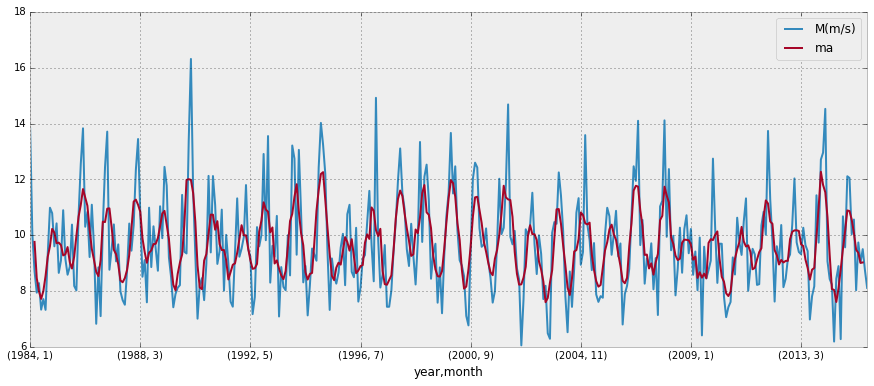

In [15]:
monthly.loc[:,['M(m/s)', 'ma']].plot(figsize = (15, 6))

In [16]:
monthly.loc[:, 'M(m/s)'].reset_index().pivot(index = 'year', columns = 'month')

M(m/s)                                                         \
month         1          2          3          4          5          6    
year                                                                      
1984   13.821505  10.043534   8.708199   7.939583   8.283871   7.330833   
1985   10.424059   8.649851   9.097043  10.895833   9.147984   8.583056   
1986   13.830972  10.303423  10.832527   9.217222  11.092742   9.570000   
1987    8.762231   9.502530  10.386962   9.063056   9.670161   7.983889   
1988   12.345430  13.447557  10.783333   8.511806   9.107661   7.594167   
1989    9.891935  12.448958  11.776478   9.206944   8.491667   7.417083   
1990   13.390726  16.317262  11.582661   9.273889   7.007796   8.217778   
1991   11.082124   8.971131   9.425000  10.917083   8.013441  10.012361   
1992    9.519624   9.928879  11.797849   9.496667   9.234140   7.170139   
1993   13.553629   8.300298   9.620296   9.226944  10.691801   7.086528   
1994   12.743817   9.300446  13.058468  10.817361   8.309677   8.898056   
1995   14.024866  13.239137  12.197043   9.416944   7.321909   9.166389   
1996   10.754839  11.089511   8.685753   8.493611  10.265726   7.620417   
1997    8.347715  14.924107   9.867876   8.124444   8.584274   9.646667   
1998   13.109677  11.514286  10.942339   9.500417   8.895833  10.409583   
1999   12.528763  11.269048   8.439247   9.330000   9.694220   7.580694   
2000   11.494892  12.468247  10.172715   9.103472   8.910349   8.529167   
2001   10.253495   9.584673   9.664516  10.243333   9.074731   8.480000   
2002   11.843817  14.686756   9.946237   9.673611  10.154435   8.813611   
2003   11.521909   9.675744   8.608065   9.995833   9.328091   7.710972   
2004   12.250134  11.419828  10.138710   7.813889   6.522446   8.699167   
2005   13.587500  10.366071   9.831720   8.748194   9.718414   7.874444   
2006    9.297984  10.054167  10.873118   9.237639   9.704032   6.799444   
2007   14.101075   9.645387  10.546640   8.262500   9.168145   8.840694   
2008   14.116129   9.943103  12.370161   9.460139   9.980376   7.843889   
2009   10.223387   8.581101   9.415591   8.026250   9.916532   6.409583   
2010    8.289919   9.695387   9.692876   7.802083   7.061559   7.421528   
2011   10.500941  11.319940   8.006317   8.849028   9.512500   9.312500   
2012   11.287500   9.791810   7.621102   9.605000   9.024597  10.365000   
2013    9.740323   9.398512   9.320027  10.267222   9.640860   9.429167   
2014   12.961156  14.528125   9.064785   8.428750   8.235349   6.188056   
2015   12.050134  10.035863  10.561156   8.027083   9.739382   9.018056   

                                                                         
month         7          8          9          10         11         12  
year                                                                     
1984    7.710618   7.324194   9.335694  10.985215  10.789306   9.600941  
1985    8.865860  10.379704   8.181250   8.021640  10.734167  12.567339  
1986    6.824866   8.847043   7.099028  10.331855  12.446944  13.712500  
1987    7.672312   7.507796   8.731528  10.418011   9.445417  10.355376  
1988   10.986022   8.857124  10.319167   9.518683   8.726111  11.036559  
1989    7.892876   8.117876   8.210139  11.445430   9.406389   9.345430  
1990    8.460618   7.672581   8.973333  12.126210   9.382361  12.120161  
1991    8.981317   7.620565   7.437778   9.339382  11.320278   9.228898  
1992    7.781048  10.290054   9.600278  10.010215  12.911806   9.820027  
1993    8.857527   8.148925   8.027778   9.998925   8.559306  13.214651  
1994    7.125806   8.196505   9.523194   9.311290   9.085000  12.423925  
1995    8.548118   8.264382   8.653056   9.555376  10.049861   8.207661  
1996    8.129167   9.162634   9.287639  10.456048  11.589306   9.658468  
1997    7.433871   7.436156   8.018889   9.434005  10.480139  11.958468  
1998    9.251882   8.233871   9.785556  13.341532   9.758194  12.096640  
1999    8.846640   7.202285   9.258333  10.698253  1

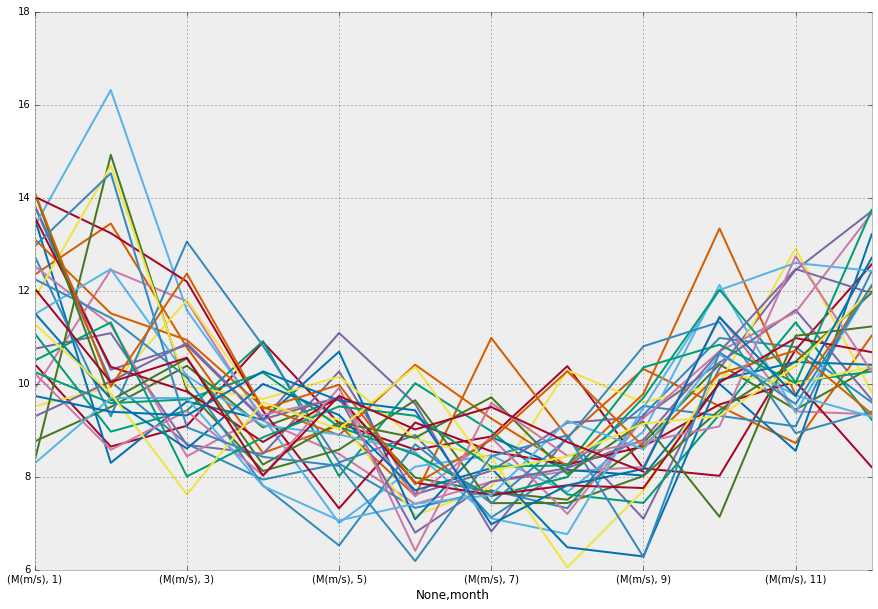

In [17]:
(monthly.loc[:, 'M(m/s)'].reset_index().pivot(
    index = 'year', 
        columns = 'month'
    ).T.plot(
        figsize = (15, 10), 
        legend = False
    )
 )